<a href="https://colab.research.google.com/github/nobusama/scGPT/blob/main/perturbation_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fine-tuning Pre-trained Model for Perturbation Prediction


In [ ]:
!pip install torch
!pip install torch-geometric

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install cell-gears

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=bbb14aa5367b87e0aaa9f21419b12d2d14a23b06b3f9008fdc6ac46bf33f2705
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
!pip install scgpt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchtext to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/save/scGPT_human

args.json  best_model.pt  vocab.json


In [ ]:
import json
import os
import sys
import time
import copy
from pathlib import Path
from typing import Iterable, List, Tuple, Dict, Union, Optional
import warnings

import torch
import numpy as np
import matplotlib
from torch import nn
from torch.nn import functional as F
from torchtext.vocab import Vocab
from torchtext._torchtext import (
    Vocab as VocabPybind,
)
from torch_geometric.loader import DataLoader
from gears import PertData, GEARS
from gears.inference import compute_metrics, deeper_analysis, non_dropout_analysis
from gears.utils import create_cell_graph_dataset_for_prediction

#sys.path.insert(0, "../")

import scgpt as scg
from scgpt.model import TransformerGenerator
from scgpt.loss import (
    masked_mse_loss,
    criterion_neg_log_bernoulli,
    masked_relative_error,
)
from scgpt.tokenizer import tokenize_batch, pad_batch, tokenize_and_pad_batch
from scgpt.tokenizer.gene_tokenizer import GeneVocab
from scgpt.utils import set_seed, map_raw_id_to_vocab_id

matplotlib.rcParams["savefig.transparent"] = False
warnings.filterwarnings("ignore")

set_seed(42)


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/scgpt/model/multiomic_model.py:19: UserWarning: flash_attn is not installed
  warnings.warn("fl

## Training Settings

In [ ]:
# settings for data prcocessing
pad_token = "<pad>"
special_tokens = [pad_token, "<cls>", "<eoc>"]
pad_value = 0  # for padding values
pert_pad_id = 2

n_hvg = 0  # number of highly variable genes
include_zero_gene = "all"  # include zero expr genes in training input, "all", "batch-wise", "row-wise", or False
max_seq_len = 1536

# settings for training
MLM = True  # whether to use masked language modeling, currently it is always on.
CLS = False  # celltype classification objective
CCE = False  # Contrastive cell embedding objective
MVC = False  # Masked value prediction for cell embedding
ECS = False  # Elastic cell similarity objective
cell_emb_style = "cls"
mvc_decoder_style = "inner product, detach"
amp = True
load_model = "/content/drive/MyDrive/save/scGPT_human"
load_param_prefixs = [
    "encoder",
    "value_encoder",
    "transformer_encoder",
]

# settings for optimizer
lr = 1e-4  # or 1e-4
batch_size = 32
eval_batch_size = 32
epochs = 1 # original is 15
schedule_interval = 1
early_stop = 5

# settings for the model
embsize = 512  # embedding dimension
d_hid = 512  # dimension of the feedforward network model in nn.TransformerEncoder
nlayers = 12  # number of nn.TransformerEncoderLayer in nn.TransformerEncoder
nhead = 8  # number of heads in nn.MultiheadAttention
n_layers_cls = 3
dropout = 0.2  # dropout probability
use_fast_transformer = True  # whether to use fast transformer

# logging
log_interval = 100

# dataset and evaluation choices
data_name = "adamson"
split = "simulation"
if data_name == "norman":
    perts_to_plot = ["SAMD1+ZBTB1"]
elif data_name == "adamson":
    perts_to_plot = ["KCTD16+ctrl"]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
save_dir = Path(f"./save/dev_perturb_{data_name}-{time.strftime('%b%d-%H-%M')}/")
save_dir.mkdir(parents=True, exist_ok=True)
print(f"saving to {save_dir}")

logger = scg.logger
scg.utils.add_file_handler(logger, save_dir / "run.log")
# log running date and current git commit
logger.info(f"Running on {time.strftime('%Y-%m-%d %H:%M:%S')}")



saving to save/dev_perturb_adamson-Jul25-17-34
scGPT - INFO - Running on 2024-07-25 17:34:23


In [ ]:
pert_data = PertData("./data")
pert_data.load(data_name=data_name)
pert_data.prepare_split(split=split, seed=1)
pert_data.get_dataloader(batch_size=batch_size, test_batch_size=eval_batch_size)

Downloading...
100%|██████████| 141M/141M [00:07<00:00, 19.4MiB/s]
Extracting zip file...
Done!
Creating pyg object for each cell in the data...
100%|██████████| 87/87 [01:48<00:00,  1.25s/it]
Saving new dataset pyg object at ./data/adamson/data_pyg/cell_graphs.pkl
Done!
Creating new splits....
Saving new splits at ./data/adamson/splits/adamson_simulation_1_0.75.pkl
Simulation split test composition:
combo_seen0:0
combo_seen1:0
combo_seen2:0
unseen_single:22
Done!
Creating dataloaders....
Done!


In [ ]:
if load_model is not None:
    model_dir = Path(load_model)
    model_config_file = model_dir / "args.json"
    model_file = model_dir / "best_model.pt"
    vocab_file = model_dir / "vocab.json"

    vocab = GeneVocab.from_file(vocab_file)
    for s in special_tokens:
        if s not in vocab:
            vocab.append_token(s)

    pert_data.adata.var["id_in_vocab"] = [
        1 if gene in vocab else -1 for gene in pert_data.adata.var["gene_name"]
    ]
    gene_ids_in_vocab = np.array(pert_data.adata.var["id_in_vocab"])
    logger.info(
        f"match {np.sum(gene_ids_in_vocab >= 0)}/{len(gene_ids_in_vocab)} genes "
        f"in vocabulary of size {len(vocab)}."
    )
    genes = pert_data.adata.var["gene_name"].tolist()

    # model
    with open(model_config_file, "r") as f:
        model_configs = json.load(f)
    logger.info(
        f"Resume model from {model_file}, the model args will override the "
        f"config {model_config_file}."
    )
    embsize = model_configs["embsize"]
    nhead = model_configs["nheads"]
    d_hid = model_configs["d_hid"]
    nlayers = model_configs["nlayers"]
    n_layers_cls = model_configs["n_layers_cls"]
else:
    genes = pert_data.adata.var["gene_name"].tolist()
    vocab = Vocab(
        VocabPybind(genes + special_tokens, None)
    )  # bidirectional lookup [gene <-> int]
vocab.set_default_index(vocab["<pad>"])
gene_ids = np.array(
    [vocab[gene] if gene in vocab else vocab["<pad>"] for gene in genes], dtype=int
)
n_genes = len(genes)



scGPT - INFO - match 4399/5060 genes in vocabulary of size 60697.
scGPT - INFO - Resume model from /content/drive/MyDrive/save/scGPT_human/best_model.pt, the model args will override the config /content/drive/MyDrive/save/scGPT_human/args.json.


# Create and train scGpt



In [ ]:
import torch

ntokens = len(vocab)  # size of vocabulary
model = TransformerGenerator(
    ntokens,
    embsize,
    nhead,
    d_hid,
    nlayers,
    nlayers_cls=n_layers_cls,
    n_cls=1,
    vocab=vocab,
    dropout=dropout,
    pad_token=pad_token,
    pad_value=pad_value,
    pert_pad_id=pert_pad_id,
    use_fast_transformer=use_fast_transformer,
)

def load_pretrained_model(model, model_file, load_param_prefixs=None):
    model_dict = model.state_dict()
    pretrained_dict = torch.load(model_file)

    if load_param_prefixs is not None:
        pretrained_dict = {
            k: v
            for k, v in pretrained_dict.items()
            if any([k.startswith(prefix) for prefix in load_param_prefixs])
        }
    else:
        pretrained_dict = {
            k: v
            for k, v in pretrained_dict.items()
            if k in model_dict and v.shape == model_dict[k].shape
        }

    for k, v in pretrained_dict.items():
        logger.info(f"Loading params {k} with shape {v.shape}")

    model_dict.update(pretrained_dict)
    model.load_state_dict(model_dict)

if load_model is not None:
    try:
        load_pretrained_model(model, model_file, load_param_prefixs)
        logger.info(f"Loading model params from {model_file}")
    except Exception as e:
        logger.error(f"Error loading model params: {e}")

model.to(device)


Using simple batchnorm instead of domain specific batchnorm
scGPT - INFO - Loading params encoder.embedding.weight with shape torch.Size([60697, 512])
scGPT - INFO - Loading params encoder.enc_norm.weight with shape torch.Size([512])
scGPT - INFO - Loading params encoder.enc_norm.bias with shape torch.Size([512])
scGPT - INFO - Loading params value_encoder.linear1.weight with shape torch.Size([512, 1])
scGPT - INFO - Loading params value_encoder.linear1.bias with shape torch.Size([512])
scGPT - INFO - Loading params value_encoder.linear2.weight with shape torch.Size([512, 512])
scGPT - INFO - Loading params value_encoder.linear2.bias with shape torch.Size([512])
scGPT - INFO - Loading params value_encoder.norm.weight with shape torch.Size([512])
scGPT - INFO - Loading params value_encoder.norm.bias with shape torch.Size([512])
scGPT - INFO - Loading params transformer_encoder.layers.0.self_attn.Wqkv.weight with shape torch.Size([1536, 512])
scGPT - INFO - Loading params transformer_enc

TransformerGenerator(
  (encoder): GeneEncoder(
    (embedding): Embedding(60697, 512, padding_idx=60694)
    (enc_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (value_encoder): ContinuousValueEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
    (linear1): Linear(in_features=1, out_features=512, bias=True)
    (activation): ReLU()
    (linear2): Linear(in_features=512, out_features=512, bias=True)
    (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (pert_encoder): Embedding(3, 512, padding_idx=2)
  (bn): BatchNorm1d(512, eps=6.1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-11): 12 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=512, bias=True)
        (dropout): Drop

In [ ]:
criterion = masked_mse_loss
criterion_cls = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, schedule_interval, gamma=0.9)
scaler = torch.cuda.amp.GradScaler(enabled=amp)


def train(model: nn.Module, train_loader: torch.utils.data.DataLoader) -> None:
    """
    Train the model for one epoch.
    """
    model.train()
    total_loss, total_mse = 0.0, 0.0
    start_time = time.time()

    num_batches = len(train_loader)
    for batch, batch_data in enumerate(train_loader):
        batch_size = len(batch_data.y)
        batch_data.to(device)
        x: torch.Tensor = batch_data.x  # (batch_size * n_genes, 2)
        ori_gene_values = x[:, 0].view(batch_size, n_genes)
        pert_flags = x[:, 1].long().view(batch_size, n_genes)
        target_gene_values = batch_data.y  # (batch_size, n_genes)

        if include_zero_gene in ["all", "batch-wise"]:
            if include_zero_gene == "all":
                input_gene_ids = torch.arange(n_genes, device=device, dtype=torch.long)
            else:
                input_gene_ids = (
                    ori_gene_values.nonzero()[:, 1].flatten().unique().sort()[0]
                )
            # sample input_gene_id
            if len(input_gene_ids) > max_seq_len:
                input_gene_ids = torch.randperm(len(input_gene_ids), device=device)[
                    :max_seq_len
                ]
            input_values = ori_gene_values[:, input_gene_ids]
            input_pert_flags = pert_flags[:, input_gene_ids]
            target_values = target_gene_values[:, input_gene_ids]

            mapped_input_gene_ids = map_raw_id_to_vocab_id(input_gene_ids, gene_ids)
            mapped_input_gene_ids = mapped_input_gene_ids.repeat(batch_size, 1)

            # src_key_padding_mask = mapped_input_gene_ids.eq(vocab[pad_token])
            src_key_padding_mask = torch.zeros_like(
                input_values, dtype=torch.bool, device=device
            )

        with torch.cuda.amp.autocast(enabled=amp):
            output_dict = model(
                mapped_input_gene_ids,
                input_values,
                input_pert_flags,
                src_key_padding_mask=src_key_padding_mask,
                CLS=CLS,
                CCE=CCE,
                MVC=MVC,
                ECS=ECS,
            )
            output_values = output_dict["mlm_output"]

            masked_positions = torch.ones_like(
                input_values, dtype=torch.bool
            )  # Use all
            loss = loss_mse = criterion(output_values, target_values, masked_positions)

        model.zero_grad()
        scaler.scale(loss).backward()
        scaler.unscale_(optimizer)
        with warnings.catch_warnings(record=True) as w:
            warnings.filterwarnings("always")
            torch.nn.utils.clip_grad_norm_(
                model.parameters(),
                1.0,
                error_if_nonfinite=False if scaler.is_enabled() else True,
            )
            if len(w) > 0:
                logger.warning(
                    f"Found infinite gradient. This may be caused by the gradient "
                    f"scaler. The current scale is {scaler.get_scale()}. This warning "
                    "can be ignored if no longer occurs after autoscaling of the scaler."
                )
        scaler.step(optimizer)
        scaler.update()

        # torch.cuda.empty_cache()

        total_loss += loss.item()
        total_mse += loss_mse.item()
        if batch % log_interval == 0 and batch > 0:
            lr = scheduler.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            cur_mse = total_mse / log_interval
            # ppl = math.exp(cur_loss)
            logger.info(
                f"| epoch {epoch:3d} | {batch:3d}/{num_batches:3d} batches | "
                f"lr {lr:05.4f} | ms/batch {ms_per_batch:5.2f} | "
                f"loss {cur_loss:5.2f} | mse {cur_mse:5.2f} |"
            )
            total_loss = 0
            total_mse = 0
            start_time = time.time()


def evaluate(model: nn.Module, val_loader: torch.utils.data.DataLoader) -> float:
    """
    Evaluate the model on the evaluation data.
    """
    model.eval()
    total_loss = 0.0
    total_error = 0.0

    with torch.no_grad():
        for batch, batch_data in enumerate(val_loader):
            batch_size = len(batch_data.y)
            batch_data.to(device)
            x: torch.Tensor = batch_data.x  # (batch_size * n_genes, 2)
            ori_gene_values = x[:, 0].view(batch_size, n_genes)
            pert_flags = x[:, 1].long().view(batch_size, n_genes)
            target_gene_values = batch_data.y  # (batch_size, n_genes)

            if include_zero_gene in ["all", "batch-wise"]:
                if include_zero_gene == "all":
                    input_gene_ids = torch.arange(n_genes, device=device)
                else:  # when batch-wise
                    input_gene_ids = (
                        ori_gene_values.nonzero()[:, 1].flatten().unique().sort()[0]
                    )

                # sample input_gene_id
                if len(input_gene_ids) > max_seq_len:
                    input_gene_ids = torch.randperm(len(input_gene_ids), device=device)[
                        :max_seq_len
                    ]
                input_values = ori_gene_values[:, input_gene_ids]
                input_pert_flags = pert_flags[:, input_gene_ids]
                target_values = target_gene_values[:, input_gene_ids]

                mapped_input_gene_ids = map_raw_id_to_vocab_id(input_gene_ids, gene_ids)
                mapped_input_gene_ids = mapped_input_gene_ids.repeat(batch_size, 1)

                # src_key_padding_mask = mapped_input_gene_ids.eq(vocab[pad_token])
                src_key_padding_mask = torch.zeros_like(
                    input_values, dtype=torch.bool, device=input_values.device
                )
            with torch.cuda.amp.autocast(enabled=amp):
                output_dict = model(
                    mapped_input_gene_ids,
                    input_values,
                    input_pert_flags,
                    src_key_padding_mask=src_key_padding_mask,
                    CLS=CLS,
                    CCE=CCE,
                    MVC=MVC,
                    ECS=ECS,
                    do_sample=True,
                )
                output_values = output_dict["mlm_output"]

                masked_positions = torch.ones_like(
                    input_values, dtype=torch.bool, device=input_values.device
                )
                loss = criterion(output_values, target_values, masked_positions)
            total_loss += loss.item()
            total_error += masked_relative_error(
                output_values, target_values, masked_positions
            ).item()
    return total_loss / len(val_loader), total_error / len(val_loader)


In [ ]:
import torch_geometric

In [ ]:
best_val_loss = float("inf")
best_model = None
patience = 0

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train_loader = pert_data.dataloader["train_loader"]
    new_batch_size = train_loader.batch_size // 16  # Reduce batch size by half
    train_loader = torch_geometric.loader.DataLoader(train_loader.dataset, batch_size=new_batch_size, shuffle=True)  # Create a new DataLoader with reduced batch size



    valid_loader = pert_data.dataloader["val_loader"]
    new_batch_size = valid_loader.batch_size // 16  # Reduce batch size by half
    valid_loader = torch_geometric.loader.DataLoader(valid_loader.dataset, batch_size=new_batch_size, shuffle=False)  # Create a new DataLoader with reduced batch size



    train(
        model,
        train_loader,
    )
    val_loss, val_mre = evaluate(
        model,
        valid_loader,
    )
    elapsed = time.time() - epoch_start_time
    logger.info("-" * 89)
    logger.info(
        f"| end of epoch {epoch:3d} | time: {elapsed:5.2f}s | "
        f"valid loss/mse {val_loss:5.4f} |"
    )
    logger.info("-" * 89)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = copy.deepcopy(model)
        logger.info(f"Best model with score {best_val_loss:5.4f}")
        patience = 0
    else:
        patience += 1
        if patience >= early_stop:
            logger.info(f"Early stop at epoch {epoch}")
            break

    torch.save(
        model.state_dict(),
        save_dir / f"model_{epoch}.pt",
    )

    scheduler.step()

scGPT - INFO - | epoch   1 | 100/27180 batches | lr 0.0001 | ms/batch 53.00 | loss  0.27 | mse  0.27 |
scGPT - INFO - | epoch   1 | 200/27180 batches | lr 0.0001 | ms/batch 42.00 | loss  0.11 | mse  0.11 |
scGPT - INFO - | epoch   1 | 300/27180 batches | lr 0.0001 | ms/batch 41.47 | loss  0.09 | mse  0.09 |
scGPT - INFO - | epoch   1 | 400/27180 batches | lr 0.0001 | ms/batch 41.51 | loss  0.10 | mse  0.10 |
scGPT - INFO - | epoch   1 | 500/27180 batches | lr 0.0001 | ms/batch 42.25 | loss  0.09 | mse  0.09 |
scGPT - INFO - | epoch   1 | 600/27180 batches | lr 0.0001 | ms/batch 41.81 | loss  0.08 | mse  0.08 |
scGPT - INFO - | epoch   1 | 700/27180 batches | lr 0.0001 | ms/batch 41.88 | loss  0.08 | mse  0.08 |
scGPT - INFO - | epoch   1 | 800/27180 batches | lr 0.0001 | ms/batch 42.19 | loss  0.09 | mse  0.09 |
scGPT - INFO - | epoch   1 | 900/27180 batches | lr 0.0001 | ms/batch 41.82 | loss  0.08 | mse  0.08 |
scGPT - INFO - | epoch   1 | 1000/27180 batches | lr 0.0001 | ms/batch 41

In [ ]:
torch.save(best_model.state_dict(), save_dir / "best_model.pt")


## Evaluations

In [ ]:
def predict(
    model: TransformerGenerator, pert_list: List[str], pool_size: Optional[int] = None
) -> Dict:
    """
    Predict the gene expression values for the given perturbations.

    Args:
        model (:class:`torch.nn.Module`): The model to use for prediction.
        pert_list (:obj:`List[str]`): The list of perturbations to predict.
        pool_size (:obj:`int`, optional): For each perturbation, use this number
            of cells in the control and predict their perturbation results. Report
            the stats of these predictions. If `None`, use all control cells.
    """
    adata = pert_data.adata
    ctrl_adata = adata[adata.obs["condition"] == "ctrl"]
    if pool_size is None:
        pool_size = len(ctrl_adata.obs)
    gene_list = pert_data.gene_names.values.tolist()
    for pert in pert_list:
        for i in pert:
            if i not in gene_list:
                raise ValueError(
                    "The gene is not in the perturbation graph. Please select from GEARS.gene_list!"
                )

    model.eval()
    device = next(model.parameters()).device
    with torch.no_grad():
        results_pred = {}
        for pert in pert_list:
            cell_graphs = create_cell_graph_dataset_for_prediction(
                pert, ctrl_adata, gene_list, device, num_samples=pool_size
            )
            loader = DataLoader(cell_graphs, batch_size=eval_batch_size, shuffle=False)
            preds = []
            for batch_data in loader:
                pred_gene_values = model.pred_perturb(
                    batch_data, include_zero_gene, gene_ids=gene_ids, amp=amp
                )
                preds.append(pred_gene_values)
            preds = torch.cat(preds, dim=0)
            results_pred["_".join(pert)] = np.mean(preds.detach().cpu().numpy(), axis=0)

    return results_pred

In [ ]:
def plot_perturbation(
    model: nn.Module, query: str, save_file: str = None, pool_size: int = None
):
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt

    sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1.5)

    adata = pert_data.adata
    gene2idx = pert_data.node_map
    cond2name = dict(adata.obs[["condition", "condition_name"]].values)
    gene_raw2id = dict(zip(adata.var.index.values, adata.var.gene_name.values))

    de_idx = [
        gene2idx[gene_raw2id[i]]
        for i in adata.uns["top_non_dropout_de_20"][cond2name[query]]
    ]
    genes = [
        gene_raw2id[i] for i in adata.uns["top_non_dropout_de_20"][cond2name[query]]
    ]
    truth = adata[adata.obs.condition == query].X.toarray()[:, de_idx]
    if query.split("+")[1] == "ctrl":
        pred = predict(model, [[query.split("+")[0]]], pool_size=pool_size)
        pred = pred[query.split("+")[0]][de_idx]
    else:
        pred = predict(model, [query.split("+")], pool_size=pool_size)
        pred = pred["_".join(query.split("+"))][de_idx]
    ctrl_means = adata[adata.obs["condition"] == "ctrl"].to_df().mean()[de_idx].values

    pred = pred - ctrl_means
    truth = truth - ctrl_means

    plt.figure(figsize=[16.5, 4.5])
    plt.title(query)
    plt.boxplot(truth, showfliers=False, medianprops=dict(linewidth=0))

    for i in range(pred.shape[0]):
        _ = plt.scatter(i + 1, pred[i], color="red")

    plt.axhline(0, linestyle="dashed", color="green")

    ax = plt.gca()
    ax.xaxis.set_ticklabels(genes, rotation=90)

    plt.ylabel("Change in Gene Expression over Control", labelpad=10)
    plt.tick_params(axis="x", which="major", pad=5)
    plt.tick_params(axis="y", which="major", pad=5)
    sns.despine()

    if save_file:
        plt.savefig(save_file, bbox_inches="tight", transparent=False)
    # plt.show()

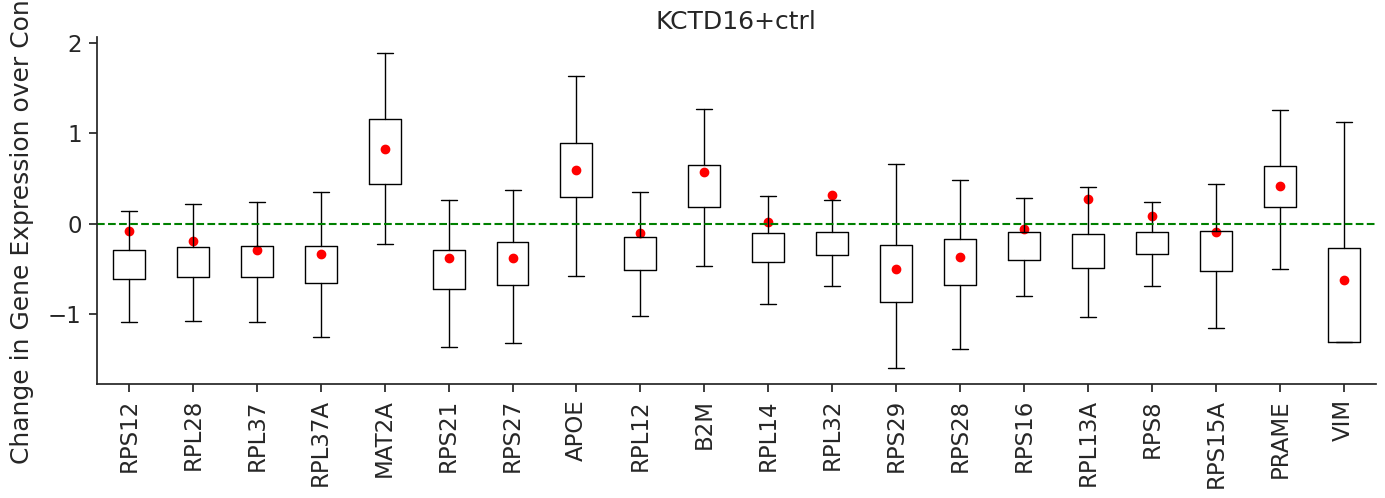

In [ ]:
# predict(best_model, [["FEV"], ["FEV", "SAMD11"]])
for p in perts_to_plot:
    plot_perturbation(best_model, p, pool_size=300, save_file=f"{save_dir}/{p}.png")



In [ ]:
def eval_perturb(
    loader: DataLoader, model: TransformerGenerator, device: torch.device
) -> Dict:
    """
    Run model in inference mode using a given data loader
    """

    model.eval()
    model.to(device)
    pert_cat = []
    pred = []
    truth = []
    pred_de = []
    truth_de = []
    results = {}
    logvar = []

    for itr, batch in enumerate(loader):
        batch.to(device)
        pert_cat.extend(batch.pert)

        with torch.no_grad():
            p = model.pred_perturb(batch, include_zero_gene, gene_ids=gene_ids)
            t = batch.y
            pred.extend(p.cpu())
            truth.extend(t.cpu())

            # Differentially expressed genes
            for itr, de_idx in enumerate(batch.de_idx):
                pred_de.append(p[itr, de_idx])
                truth_de.append(t[itr, de_idx])

    # all genes
    results["pert_cat"] = np.array(pert_cat)
    pred = torch.stack(pred)
    truth = torch.stack(truth)
    results["pred"] = pred.detach().cpu().numpy().astype(float)
    results["truth"] = truth.detach().cpu().numpy().astype(float)

    pred_de = torch.stack(pred_de)
    truth_de = torch.stack(truth_de)
    results["pred_de"] = pred_de.detach().cpu().numpy().astype(float)
    results["truth_de"] = truth_de.detach().cpu().numpy().astype(float)

    return results

In [ ]:
test_loader = pert_data.dataloader["test_loader"]
test_res = eval_perturb(test_loader, best_model, device)
test_metrics, test_pert_res = compute_metrics(test_res)
print(test_metrics)

# save the dicts in json
with open(f"{save_dir}/test_metrics.json", "w") as f:
    json.dump(test_metrics, f)
with open(f"{save_dir}/test_pert_res.json", "w") as f:
    json.dump(test_pert_res, f)

deeper_res = deeper_analysis(pert_data.adata, test_res)
non_dropout_res = non_dropout_analysis(pert_data.adata, test_res)

metrics = ["pearson_delta", "pearson_delta_de"]
metrics_non_dropout = [
    "pearson_delta_top20_de_non_dropout",
    "pearson_top20_de_non_dropout",
]
subgroup_analysis = {}
for name in pert_data.subgroup["test_subgroup"].keys():
    subgroup_analysis[name] = {}
    for m in metrics:
        subgroup_analysis[name][m] = []

    for m in metrics_non_dropout:
        subgroup_analysis[name][m] = []

for name, pert_list in pert_data.subgroup["test_subgroup"].items():
    for pert in pert_list:
        for m in metrics:
            subgroup_analysis[name][m].append(deeper_res[pert][m])

        for m in metrics_non_dropout:
            subgroup_analysis[name][m].append(non_dropout_res[pert][m])

for name, result in subgroup_analysis.items():
    for m in result.keys():
        subgroup_analysis[name][m] = np.mean(subgroup_analysis[name][m])
        logger.info("test_" + name + "_" + m + ": " + str(subgroup_analysis[name][m]))

{'mse': 0.007370387258993897, 'mse_de': 0.1634758356063262, 'pearson': 0.9882317871448131, 'pearson_de': 0.9772086956369399}
scGPT - INFO - test_combo_seen0_pearson_delta: nan
scGPT - INFO - test_combo_seen0_pearson_delta_de: nan
scGPT - INFO - test_combo_seen0_pearson_delta_top20_de_non_dropout: nan
scGPT - INFO - test_combo_seen0_pearson_top20_de_non_dropout: nan
scGPT - INFO - test_combo_seen1_pearson_delta: nan
scGPT - INFO - test_combo_seen1_pearson_delta_de: nan
scGPT - INFO - test_combo_seen1_pearson_delta_top20_de_non_dropout: nan
scGPT - INFO - test_combo_seen1_pearson_top20_de_non_dropout: nan
scGPT - INFO - test_combo_seen2_pearson_delta: nan
scGPT - INFO - test_combo_seen2_pearson_delta_de: nan
scGPT - INFO - test_combo_seen2_pearson_delta_top20_de_non_dropout: nan
scGPT - INFO - test_combo_seen2_pearson_top20_de_non_dropout: nan
scGPT - INFO - test_unseen_single_pearson_delta: 0.5605296157151005
scGPT - INFO - test_unseen_single_pearson_delta_de: 0.7513880171917733
scGPT -